<a href="https://colab.research.google.com/github/Juramirezlop/AlgorithmsUN2024I/blob/main/Juramirezlop_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LAB 8** Monte Carlo - 01 Knapsack Counting#

**First Point** Count and calculate the exact proportion of  “Knapsack solutions.” for the problem in the image

#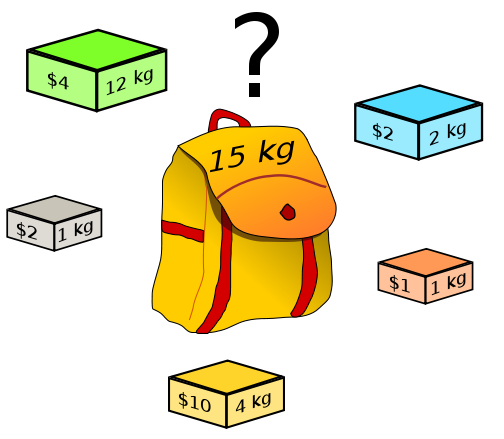

In [6]:
Values = [(12, 4), (2, 2), (1, 2), (1, 1), (4, 10)]
n = len(Values)
solutions = set()

for i in range(1 << n):
    current_sum = 0
    value_sum = 0
    selected_elements = []

    for j in range(n):
        if i & (1 << j):
            selected_elements.append(Values[j])
            current_sum += Values[j][0]
            value_sum += Values[j][1]

    if current_sum <= 15:
        solutions.add((tuple(elem[0] for elem in selected_elements), value_sum))

print(f"The solution is: {len(solutions)}")
print(f"The total number os alternatives posibilities is: {2**n}")
print(f"The proportion of solutions is: {len(solutions)}/{2**n} = {len(solutions)/2**n}")

The solution is: 23
The total number os alternatives posibilities is: 32
The proportion of solutions is: 23/32 = 0.71875


**Second Point** Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Monte Carlo with 1.000, 10.000 random binary vectors

In [22]:
import random

def count_knapsack_solutions_monte_carlo(weights, capacity, num_vectors):
    n = len(weights)
    solutions_count = 0

    for _ in range(num_vectors):
        x = [random.randint(0, 1) for _ in range(n)]
        total_weight = sum(w * xi for w, xi in zip(weights, x))

        if total_weight <= capacity:
            solutions_count += 1

    proportion = solutions_count / num_vectors

    return proportion, solutions_count

weights = [1, 2, 3, 4, 5, 6, 7, 9, 10]
capacity = 10
num_vectors_list = [1000, 10000]

for num_vectors in num_vectors_list:
    proportion, num_solutions = count_knapsack_solutions_monte_carlo(weights, capacity, num_vectors)
    print(f"Monte Carlo with {num_vectors} random vectors:")
    print(f"Proportion of Knapsack solutions: {proportion*100:.2f}%")
    print(f"Number of Knapsack solutions: {num_solutions}\n")


Monte Carlo with 1000 random vectors:
Proportion of Knapsack solutions: 7.50%
Number of Knapsack solutions: 75

Monte Carlo with 10000 random vectors:
Proportion of Knapsack solutions: 8.24%
Number of Knapsack solutions: 824



**Third Point** Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.


In [25]:
pip install numba numpy

In [27]:
import numpy as np
from numba import jit

@jit(nopython=True)
def count_knapsack_solutions_monte_carlo(tamaños, capacidad, iteracion):
    k = 0
    n = len(tamaños)
    for _ in range(iteracion):
        vector_binario = np.zeros(n, dtype=np.int64)
        for i in range(n):
            vector_binario[i] = np.random.randint(0, 2)
        suma = np.sum(vector_binario * tamaños)
        if suma <= capacidad:
            k += 1
    return k

tamaños = np.arange(1, 51)
capacidades = [10, 50, 100, 1275]
iteraciones = [10000, 100000, 1000000]

for capacidad in capacidades:
    print(f"\nCapacity: {capacidad}")
    for iteracion in iteraciones:
        k = count_knapsack_solutions_monte_carlo(tamaños, capacidad, iteracion)
        p = k / iteracion
        print(f"Binary vector: {iteracion}, solutions: {k}, proportion: {p:.6f}")


Capacity: 10
Binary vector: 10000, solutions: 0, proportion: 0.000000
Binary vector: 100000, solutions: 0, proportion: 0.000000
Binary vector: 1000000, solutions: 0, proportion: 0.000000

Capacity: 50
Binary vector: 10000, solutions: 0, proportion: 0.000000
Binary vector: 100000, solutions: 0, proportion: 0.000000
Binary vector: 1000000, solutions: 0, proportion: 0.000000

Capacity: 100
Binary vector: 10000, solutions: 0, proportion: 0.000000
Binary vector: 100000, solutions: 0, proportion: 0.000000
Binary vector: 1000000, solutions: 0, proportion: 0.000000

Capacity: 1275
Binary vector: 10000, solutions: 10000, proportion: 1.000000
Binary vector: 100000, solutions: 100000, proportion: 1.000000
Binary vector: 1000000, solutions: 1000000, proportion: 1.000000
